In [46]:
# IMDB
from keras.datasets import imdb
# num_words的意思是仅保留训练数据中前10000个最常出现的单词，低频词会被舍弃
# 这样得到的向量数据不会太大，便于处理
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
# train_data\test_data是单词索引组成的列表
# t\rain_labels\test_labels是0或1组成的列表，代表正负面

In [47]:
print(train_data.shape,train_labels.shape)

(25000,) (25000,)


In [48]:
train_data[2]

[1,
 14,
 47,
 8,
 30,
 31,
 7,
 4,
 249,
 108,
 7,
 4,
 5974,
 54,
 61,
 369,
 13,
 71,
 149,
 14,
 22,
 112,
 4,
 2401,
 311,
 12,
 16,
 3711,
 33,
 75,
 43,
 1829,
 296,
 4,
 86,
 320,
 35,
 534,
 19,
 263,
 4821,
 1301,
 4,
 1873,
 33,
 89,
 78,
 12,
 66,
 16,
 4,
 360,
 7,
 4,
 58,
 316,
 334,
 11,
 4,
 1716,
 43,
 645,
 662,
 8,
 257,
 85,
 1200,
 42,
 1228,
 2578,
 83,
 68,
 3912,
 15,
 36,
 165,
 1539,
 278,
 36,
 69,
 2,
 780,
 8,
 106,
 14,
 6905,
 1338,
 18,
 6,
 22,
 12,
 215,
 28,
 610,
 40,
 6,
 87,
 326,
 23,
 2300,
 21,
 23,
 22,
 12,
 272,
 40,
 57,
 31,
 11,
 4,
 22,
 47,
 6,
 2307,
 51,
 9,
 170,
 23,
 595,
 116,
 595,
 1352,
 13,
 191,
 79,
 638,
 89,
 2,
 14,
 9,
 8,
 106,
 607,
 624,
 35,
 534,
 6,
 227,
 7,
 129,
 113]

In [49]:
train_labels[2]

0

In [50]:
# 由于限定为前 10 000 个最常见的单词，单词索引都不会超过 10 000
max(max(i for i in train_data))

9995

In [51]:
# 将某条评论迅速解码为英文单词
word_index = imdb.get_word_index()

In [52]:
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [53]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [54]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [55]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [56]:
#  将评论解码。注意，索引减去了3，
# 因为0、1、2 是为“padding”（填充）,“ start of sequence”（序 列开始）,“unknown”（未知词）分别保留的索引

In [57]:
reverse_word_index.get(train_data[0][3])

'with'

In [58]:
# 3.4.2准备数据
# 不能将整数序列直接输入神经网络。你需要将列表转换为张量

In [59]:
# 将整数序列编码为二进制矩阵 
import numpy as np

def vectoriza_sequeces(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# 将训练和测试数据向量化
x_train = vectoriza_sequeces(train_data)
xtest = vectoriza_sequeces(test_data)

In [60]:
print(x_train[0],len(x_train[0]),sep='\n\n')

[0. 1. 1. ... 0. 0. 0.]

10000


In [61]:
# 将标签向量化
print(len(train_labels))
y_train = np.asarray(train_labels,dtype='float32')
y_test = np.asarray(test_labels,dtype='float32')

25000


In [62]:
# 模型定义
from keras import models
from keras import layers

# 序贯模型是多个网络层的线性堆叠，也就是“一条路走到黑”。
model = models.Sequential()
# 层有16个隐藏单元，一个隐藏单元是层表示空间的一个维度
# 每个带有 relu 激活的 Dense 层都实现了下列张量 运算：
# output = relu(dot(W, input) + b)
# 16 个隐藏单元对应的权重矩阵 W 的形状为 (input_dimension, 16)，与 W 做点积相当于 
# 将输入数据投影到16 维表示空间中

# 模型需要知道输入数据的shape，因此，Sequential的第一层需要接受一个关于输入数据shape的参数，
# 后面的各个层则可以自动的推导出中间数据的shape，因此不需要为每个层都指定这个参数
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# 第三层输出一个标量，预测当前评论的情感
# 使用 sigmoid 激活以输出一个 0~1 范围内的概率值
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
# 编译模型
# 在训练模型之前，我们需要通过compile来对学习过程进行配置
# compile接收三个参数：优化器、损失函数和指标列表metrics
# 优化器optimizer：该参数可指定为已预定义的优化器名，如rmsprop、adagrad，
# 或一个Optimizer类的对象
# 损失函数loss：该参数为模型试图最小化的目标函数，它可为预定义的损失函数名，
# 如categorical_crossentropy、mse，也可以为一个损失函数
# 指标列表metrics：对分类问题，我们一般将该列表设置为metrics=['accuracy']。
# 指标可以是一个预定义指标的名字,也可以是一个用户定制的函数.指标函数应该返回
# 单个张量,或一个完成metric_name - > metric_value映射的字典.
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [64]:
# 配置优化器
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [65]:
# 使用自定义的损失和指标 
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [66]:
# 为了在训练过程中监控模型在前所未见的数据上的精度，你需要将原始训练数据留出 10 000 个样本作为验证集
# 留出验证集 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [67]:
# 训练模型
# fit(self, x, y, batch_size=32, epochs=10, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0)
# x：输入数据
# y：标签
# batch_size：整数，指定进行梯度下降时每个batch包含的样本数
# epochs：整数，训练终止时的epoch值，训练将在达到该epoch值时停止，当没有设置initial_epoch时，它就是训练的总轮数，否则训练的总轮数为epochs - inital_epoch
# verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
# callbacks：list，其中的元素是keras.callbacks.Callback的对象。这个list中的回调函数将会在训练过程中的适当时机被调用
# validation_split：0~1之间的浮点数，用来指定训练集的一定比例数据作为验证集。验证集将不参与训练，并在每个epoch结束后测试的模型的指标，如损失函数、精确度等。
# 注意，validation_split的划分在shuffle之前，因此如果你的数据本身是有序的，需要先手工打乱再指定validation_split，否则可能会出现验证集样本不均匀。
# validation_data：形式为（X，y）的tuple，是指定的验证集。此参数将覆盖validation_spilt
# shuffle：布尔值或字符串，一般为布尔值，表示是否在训练过程中随机打乱输入样本的顺序。若为字符串“batch”，则是用来处理HDF5数据的特殊情况，它将在batch内部将数据打乱
# class_weight：字典，将不同的类别映射为不同的权值，该参数用来在训练过程中调整损失函数（只能用于训练）
# sample_weight：权值的numpy array，用于在训练时调整损失函数
# initial_epoch: 从该参数指定的epoch开始训练，在继续之前的训练时有用。

# fit函数返回一个History的对象，其History.history属性记录了损失函数和其他指标的数值随epoch变化的情况，如果有验证集的话，也包含了验证集的这些指标变化情况


model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(partial_x_train,  # 数据
                   partial_y_train,  # 标签
                   epochs=20, # 训练轮数
                   batch_size=512,  # 每批的样本数
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3086 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1427 - acc: 0.9542 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3165 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.0980 - acc: 0.9706 - val_loss: 0.3127 - 

In [68]:
# 调用 model.fit() 返回了一个 History 对象。这个对象有一个成员 history，
# 它 是一个字典，包含训练过程中的所有数据
history_dict = history.history
# 验证损失，验证精度，训练损失，训练精度
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

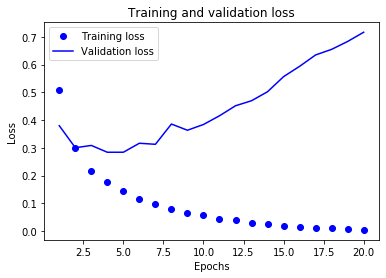

In [73]:
# 绘制训练损失和验证损失
%matplotlib inline
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
 
plt.show()


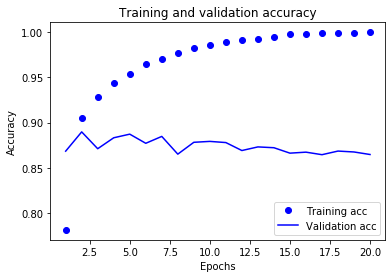

In [75]:
# 绘制训练精度和验证精度 
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
 
plt.show()
